# Importing

In [1]:
#imporing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

# EDA

## Cleaning Train Data 

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

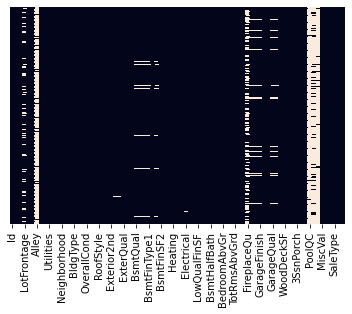

In [5]:
#Heatmap
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [6]:
#Fill missiong values
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train.shape

(1460, 81)

In [7]:
#Removing alley column from the train dataset
df_train=df_train.drop(['Alley','PoolQC','MiscFeature','MiscFeature','Fence'],axis=1)


In [8]:
#Replacing null with mode
for column in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtQual',
               'BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinType1','FireplaceQu',
              'Electrical','MasVnrType','MasVnrArea']:
    df_train[column].fillna(df_train[column].mode()[0], inplace=True)

In [9]:
#finding the null
#df_train.isnull().sum()

## Cleaning the Test Data

In [10]:
# Removing Null values/columns
df_test=df_test.drop(['Alley','PoolQC','MiscFeature','MiscFeature','Fence'],axis=1)

In [11]:
# Removing na with mode
for column in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtQual',
               'BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinType1','FireplaceQu',
              'Electrical','MasVnrType','MasVnrArea','MSZoning','Utilities','Exterior1st',
               'Exterior2nd','BsmtFinSF1','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual',
              'Functional','GarageCars','SaleType','BsmtFinSF2','BsmtUnfSF','GarageArea']:
            df_test[column].fillna(df_train[column].mode()[0], inplace=True)

In [12]:
#Removing Na values with mean
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

<AxesSubplot:>

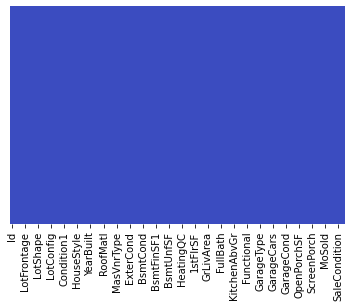

In [13]:
#Checking for Null for test and Train
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [22]:
colums=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
       'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','MasVnrType','ExterQual',
       'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
        'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
       'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
colums

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']